# Import necessary libraries:

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder


# Load and Preprocess dataset

In [20]:
# Load the dataset using pandas.read_csv

df = pd.read_csv("adult.csv")

In [21]:
# Print first rows the dataset

print(df.head())

   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country incom

In [22]:
# Drop rows with any missing values

df.replace('?', pd.NA, inplace=True)
df = df.dropna().reset_index(drop=True)

# Visualize dataset

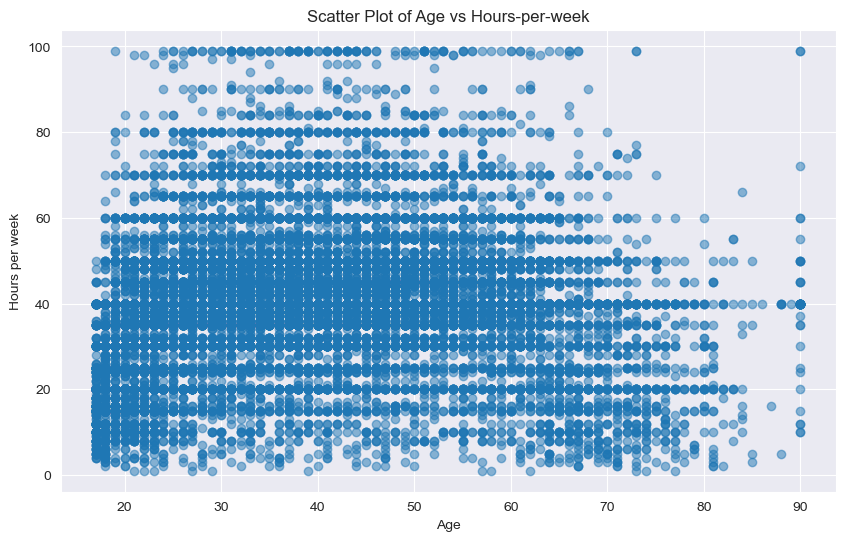

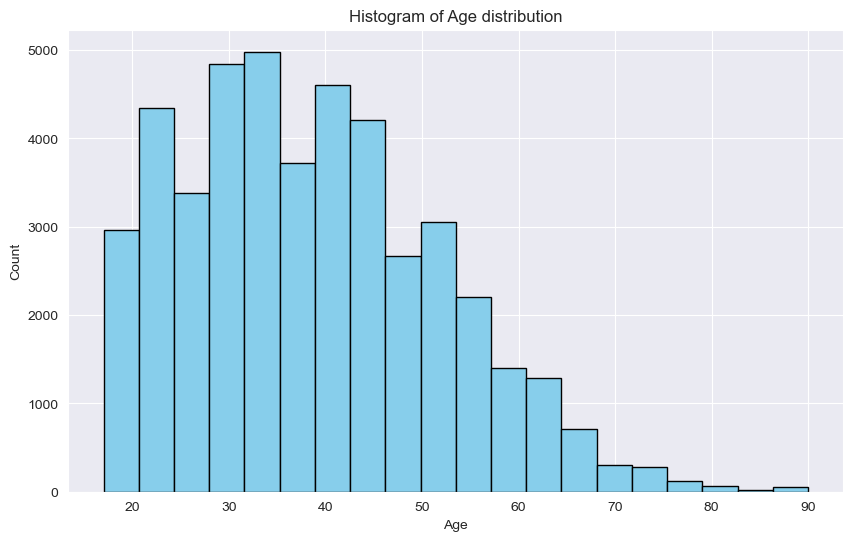

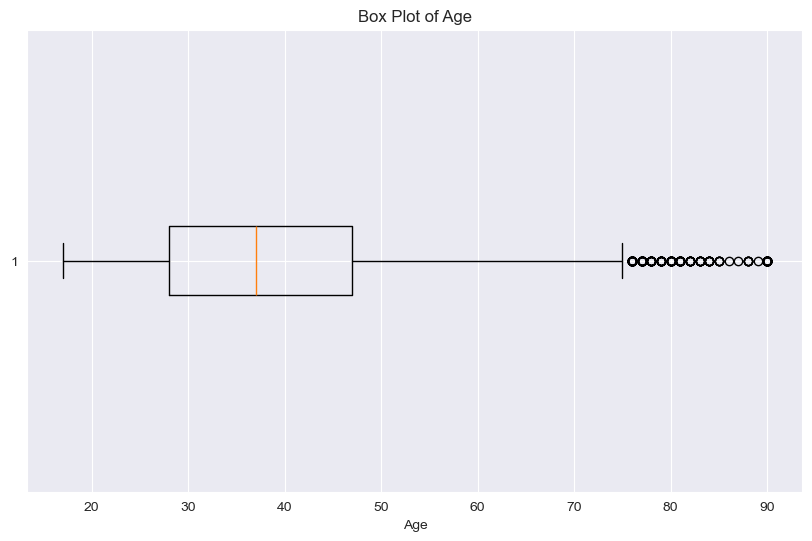

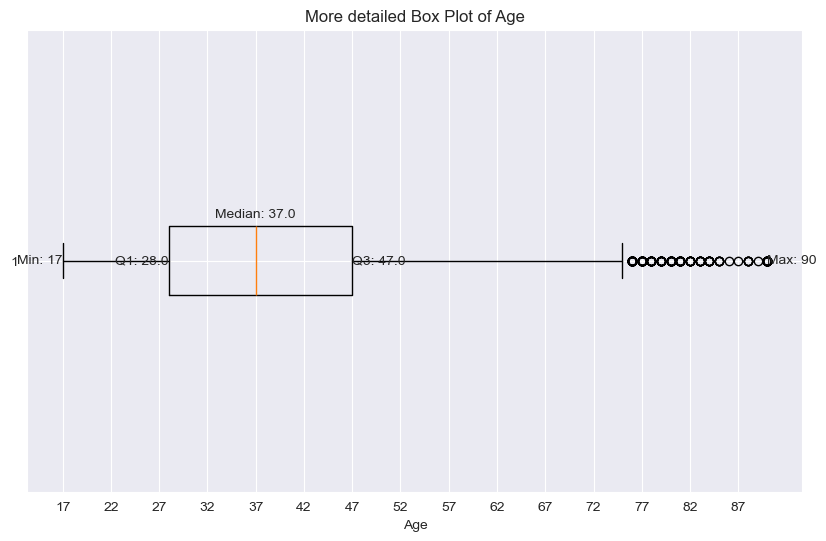

D:\Drive_D\Programs\Anaconda\envs\DataScience_ML\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Drive_D\Programs\Anaconda\envs\DataScience_ML\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Drive_D\Programs\Anaconda\envs\DataScience_ML\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


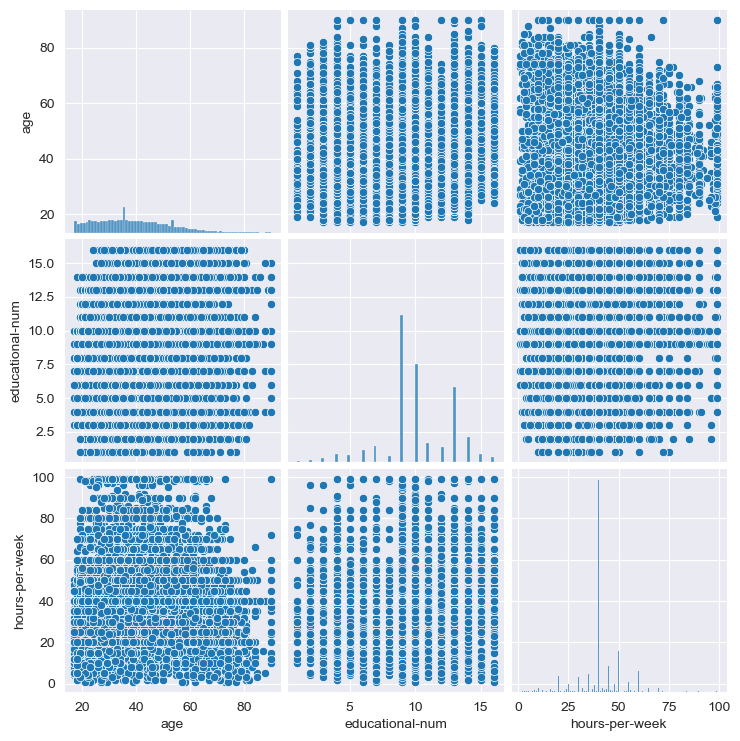

In [23]:
# Visualize the dataset using scatter plots, histograms, box plots, and pair plots to understand the data distribution, identify outliers, and detect patterns.


# Scatter plot for Age vs Hours-per-week

# your code here:

plt.figure(figsize=(10, 6))
plt.scatter(df["age"], df["hours-per-week"], alpha=0.5)
plt.xlabel("Age")
plt.ylabel("Hours per week")
plt.title("Scatter Plot of Age vs Hours-per-week")
plt.grid(True)
plt.show()




# Histogram for distribution of age distribution

# your code here:

plt.figure(figsize=(10, 6))
plt.hist(df["age"], bins=20, color="skyblue", edgecolor="black")
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Histogram of Age distribution")
plt.grid(True)
plt.show()



# Box plot for age to see outliers

# your code here:

plt.figure(figsize=(10, 6))
plt.boxplot(df["age"], vert=False)
plt.xlabel('Age')
plt.title('Box Plot of Age')
plt.grid(True)
plt.show()


# More detailed Box plot:
q1 = df['age'].quantile(0.25)
median = df['age'].median()
q3 = df['age'].quantile(0.75)
minimum = df['age'].min()
maximum = df['age'].max()


plt.figure(figsize=(10, 6))
plt.boxplot(df['age'], vert=False)
plt.xlabel('Age')
plt.title('More detailed Box Plot of Age')

# Customize tick locations and labels
plt.xticks(np.arange(minimum, maximum+1, 5))  # Adjust the step size as needed

# Annotate the plot to display quartile values
plt.text(minimum, 1, f'Min: {minimum}', ha='right', va='center')
plt.text(q1, 1, f'Q1: {q1}', ha='right', va='center')
plt.text(median, 1.1, f'Median: {median}', ha='center', va='center')
plt.text(q3, 1, f'Q3: {q3}', ha='left', va='center')
plt.text(maximum, 1, f'Max: {maximum}', ha='left', va='center')

plt.grid(True)
plt.show()


# Pair plot for Age, education-num, and hours-per-week

# your code here:

selected_columns = ["age", "educational-num", "hours-per-week"]
sns.pairplot(df[selected_columns])
plt.show()



# Encode and Normalize dataset

In [24]:
# Use one-hot encoding to convert categorical features into numerical format

categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']

# using pandas
df_encoded_pandas = pd.get_dummies(df, columns=categorical_cols)

# using scikit-learn
onehot_encoder = OneHotEncoder(sparse_output=False)

onehot_encoded = onehot_encoder.fit_transform(df[categorical_cols])
onehot_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(categorical_cols))

df_encoded = df.drop(categorical_cols, axis='columns')
df_encoded = pd.concat([df_encoded, onehot_df], axis='columns')

print(df_encoded.head())


   age  fnlwgt  educational-num  capital-gain  capital-loss  hours-per-week  \
0   25  226802                7             0             0              40   
1   38   89814                9             0             0              50   
2   28  336951               12             0             0              40   
3   44  160323               10          7688             0              40   
4   34  198693                6             0             0              30   

   workclass_Federal-gov  workclass_Local-gov  workclass_Private  \
0                    0.0                  0.0                1.0   
1                    0.0                  0.0                1.0   
2                    0.0                  1.0                0.0   
3                    0.0                  0.0                1.0   
4                    0.0                  0.0                1.0   

   workclass_Self-emp-inc  ...  native-country_Scotland  native-country_South  \
0                     0.0  ...     

In [25]:
# Use StandardScaler from sklearn.preprocessing to normalize the features.

scaler = StandardScaler()


# your code here:

df_normalized = scaler.fit_transform(df_encoded)

# Convert the normalized array back to a DataFrame
df_normalized = pd.DataFrame(df_normalized, columns=df_encoded.columns) 

print(df_normalized.head())

        age    fnlwgt  educational-num  capital-gain  capital-loss  \
0 -1.024983  0.350889        -1.221559     -0.146733      -0.21878   
1 -0.041455 -0.945878        -0.438122     -0.146733      -0.21878   
2 -0.798015  1.393592         0.737034     -0.146733      -0.21878   
3  0.412481 -0.278420        -0.046403      0.877467      -0.21878   
4 -0.344079  0.084802        -1.613277     -0.146733      -0.21878   

   hours-per-week  workclass_Federal-gov  workclass_Local-gov  \
0       -0.078120              -0.179133            -0.271285   
1        0.754701              -0.179133            -0.271285   
2       -0.078120              -0.179133             3.686155   
3       -0.078120              -0.179133            -0.271285   
4       -0.910942              -0.179133            -0.271285   

   workclass_Private  workclass_Self-emp-inc  ...  native-country_Scotland  \
0           0.598108               -0.194353  ...                -0.021035   
1           0.598108            

# Implement PCA from Scratch

In [26]:
# Start by ensuring all data is numeric and normalized.
# Subtract the mean to center the data, calculate the covariance matrix, find eigenvalues and eigenvectors, sort them, and project the data onto the principal components.
# This section will test your understanding of PCA's mathematical foundation.


# your code here:

data = df_normalized.values
data_centered = data - np.mean(data, axis=0)  # Subtract the mean to center the data

cov_matrix = np.cov(data_centered, rowvar=False)

print(cov_matrix)

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print(f"Eigenvalues:\n{eigenvalues}")
print(f"Eigenvectors:\n{eigenvectors}")

sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

num_components = 2
principal_components = sorted_eigenvectors[:, :num_components]
projected_data = np.dot(df_normalized, principal_components)

print(f"projected data:\n{projected_data}")

[[ 1.00002211 -0.07579365  0.03762378 ...  0.00329444 -0.23704548
   0.23704548]
 [-0.07579365  1.00002211 -0.04199395 ...  0.00486733  0.00726407
  -0.00726407]
 [ 0.03762378 -0.04199395  1.00002211 ... -0.00642556 -0.33280724
   0.33280724]
 ...
 [ 0.00329444  0.00486733 -0.00642556 ...  1.00002211 -0.00522382
   0.00522382]
 [-0.23704548  0.00726407 -0.33280724 ... -0.00522382  1.00002211
  -1.00002211]
 [ 0.23704548 -0.00726407  0.33280724 ...  0.00522382 -1.00002211
   1.00002211]]
Eigenvalues:
[ 5.25605454e+00  3.24352198e+00  2.62607025e+00  2.35247066e+00
  1.94195012e+00  1.88777368e+00  1.71146414e+00  1.61510396e+00
  2.48396353e-01  2.02243533e-02  4.30141496e-01  4.84270096e-01
  1.43879428e+00  5.43942017e-01  1.40824129e+00  5.98402327e-01
  6.19892951e-01  6.60722588e-01  1.32237492e+00  1.29492847e+00
  7.31116087e-01  7.26644739e-01  1.25534407e+00  1.24725538e+00
  7.83809790e-01  1.21227516e+00  7.99901119e-01  8.09212030e-01
  1.18997051e+00  1.17523059e+00  1.1713

# Visualize the PCA-reduced data

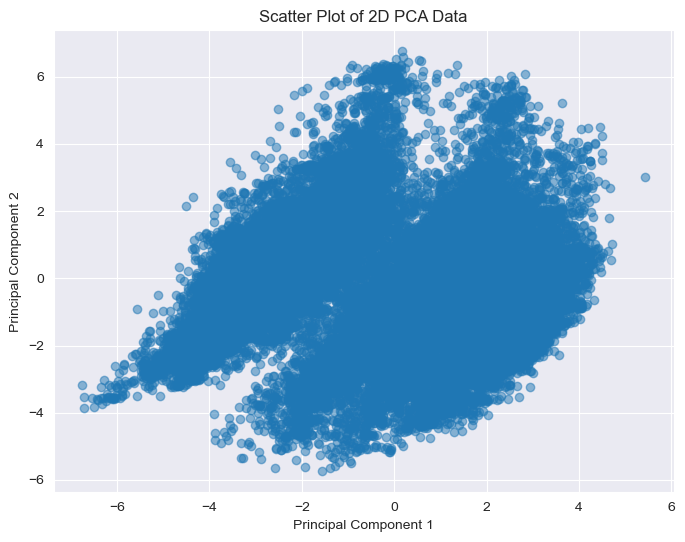

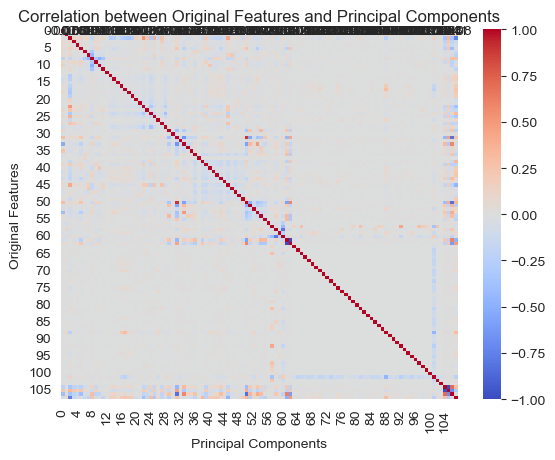

In [27]:

# Scatter Plot for 2D PCA Data (choose 2 principal components)

# your code here:

pc1 = projected_data[:, 0]
pc2 = projected_data[:, 1]

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(pc1, pc2, alpha=0.5)
plt.title('Scatter Plot of 2D PCA Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)

plt.show()



# Heatmap for Principal Component Correlation
# This requires calculating the correlation matrix between the original data and the PCA-transformed data.

correlation_matrix = np.corrcoef(df_normalized.T, projected_data.T)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Original Features and Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Original Features')
plt.show()



